In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from scipy.stats import boxcox

df = pd.read_csv('Data_to_Transform.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Moderate Positive Skew  10000 non-null  float64
 1   Highly Positive Skew    10000 non-null  float64
 2   Moderate Negative Skew  10000 non-null  float64
 3   Highly Negative Skew    10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


In [2]:
df.describe()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.000000,6.000000,6.000000,6.000000
std,2.047237,1.882685,2.045060,1.860556
min,0.899990,2.895074,-6.335679,-7.036091
25%,4.518431,4.614818,4.779235,5.049961
50%,5.751642,5.634956,6.233932,6.360402
75%,7.258956,6.924035,7.465319,7.366753
max,16.204517,18.052331,11.180748,9.027485


--------------------------------

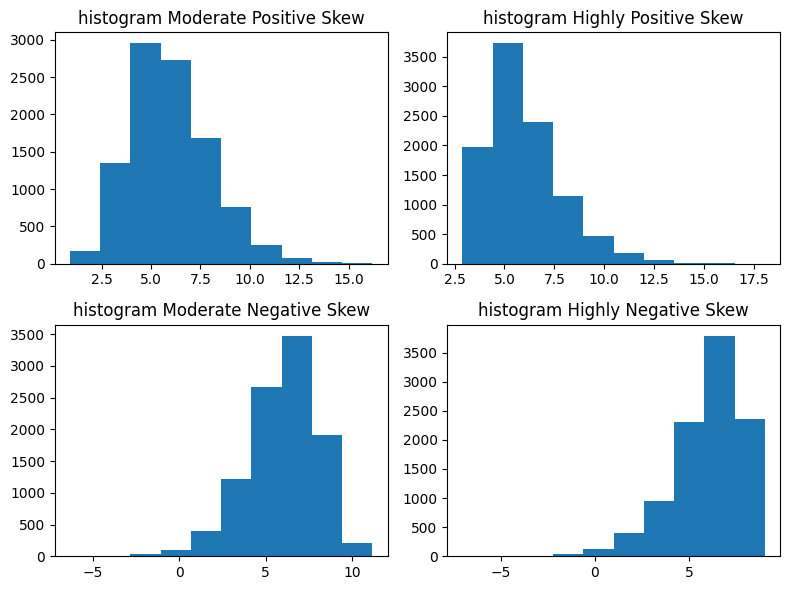

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))


for i, c in enumerate(df):
    ind = i // 2
    col = i % 2
    ax[ind, col].hist(df[c])
    ax[ind, col].set_title(f'histogram {c}')
    
    plt.tight_layout()
    
plt.show()

In [4]:
from scipy import stats

def normal_test(data):
    jb_normal = stats.jarque_bera(data)
    ad_normal = stats.anderson(data)

    statistic_jb = jb_normal[0]
    pvalue_jb = jb_normal[1]
    print('Jarque-Bera test:')
    print(f'The test statistic {statistic_jb}')
    print('--' * 30)
    
    if pvalue_jb <= 0.05:
        print(f'{round(pvalue_jb, 5)} | The Distributed are not normaly')
    else:
        print(f'{round(pvalue_jb, 5)} | The Distribution are normal.')
    print('--' * 30)
    
    test_statistic_Anderson = ad_normal[0]
    critical = ad_normal[1]
    significant = ad_normal[2]
    print('test Anderson Darling')
    print(f'{test_statistic_Anderson = }')
    print(f'{critical = }')
    print('--' * 30)
    for i in critical:
        if test_statistic_Anderson < i:
            print(f'The Distribution are normal in significant level {i}')
        else:
            print(f'The Distribution are not normal  in significant leve {i}')  
    print('--' * 30)

In [5]:
for i in df:
    normal_test(df[i])

Jarque-Bera test:
The test statistic 859.416840562087
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 51.804932171016844
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are not normal  in significant leve 0.576
The Distribution are not normal  in significant leve 0.656
The Distribution are not normal  in significant leve 0.787
The Distribution are not normal  in significant leve 0.918
The Distribution are not normal  in significant leve 1.092
------------------------------------------------------------
Jarque-Bera test:
The test statistic 5101.0508936228525
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_stati

In [6]:
df.agg(['skew', 'kurtosis']).T

,skew,kurtosis
Moderate Positive Skew,0.656308,0.584120
Highly Positive Skew,1.271249,2.405999
Moderate Negative Skew,-0.690244,0.790534
Highly Negative Skew,-1.201891,2.086863


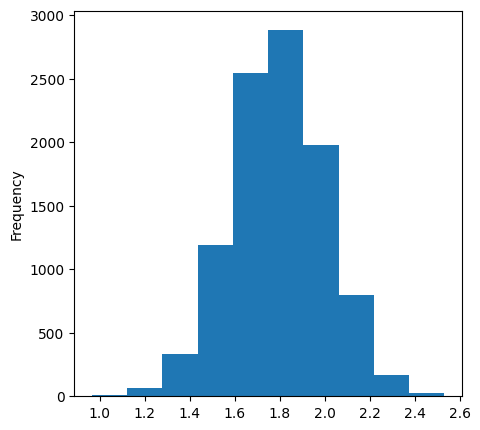

In [7]:
x_trans = np.cbrt(df.iloc[:, 0])

plt.rcParams['figure.figsize'] = 5, 5
x_trans.plot(kind='hist')
plt.show()

In [8]:
normal_test(x_trans)

Jarque-Bera test:
The test statistic 0.7626207834156722
------------------------------------------------------------
0.68297 | The Distribution are normal.
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 0.3896425834100228
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are normal in significant level 0.576
The Distribution are normal in significant level 0.656
The Distribution are normal in significant level 0.787
The Distribution are normal in significant level 0.918
The Distribution are normal in significant level 1.092
------------------------------------------------------------


In [85]:
transform_df = pd.DataFrame({'ModeratePositiveSkew_cbrt': x_trans})

<Axes: ylabel='Frequency'>

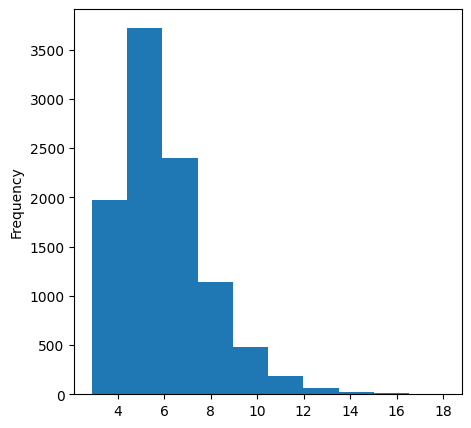

In [10]:
df['Highly Positive Skew'].plot(kind='hist')

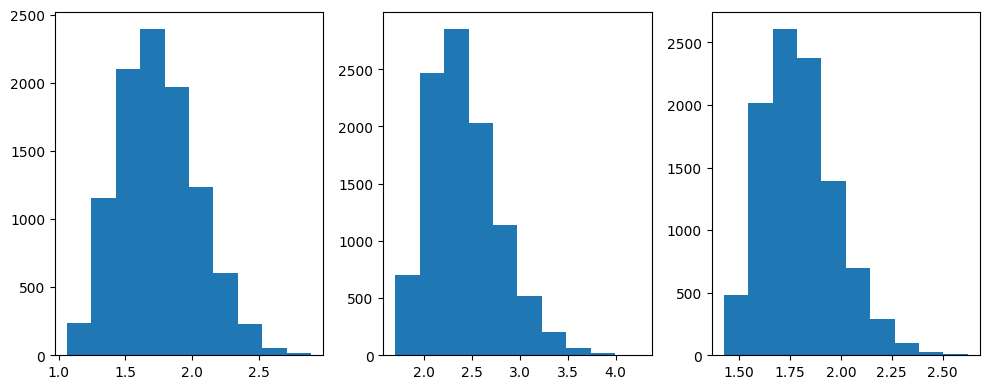

In [11]:
x1 = df.iloc[:, 1]

x_1log = np.log(x1)
x_1sqrt = np.sqrt(x1)
x_1cdrt = np.cbrt(x1)

fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].hist(x_1log)
ax[1].hist(x_1sqrt)
ax[2].hist(x_1cdrt)
plt.tight_layout()
plt.show()

In [12]:
pt = PowerTransformer()
x_1_box = pt.fit_transform(df.iloc[:, 1].values.reshape(-1, 1))

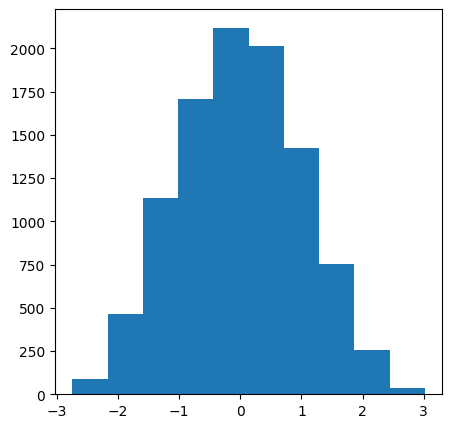

In [13]:
plt.rcParams['figure.figsize'] = 5, 5
plt.hist(x_1_box.reshape(-1))
plt.show()

In [14]:
normal_test(x_1_box.reshape(-1))

Jarque-Bera test:
The test statistic 99.28174683819843
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 6.824914751783581
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are not normal  in significant leve 0.576
The Distribution are not normal  in significant leve 0.656
The Distribution are not normal  in significant leve 0.787
The Distribution are not normal  in significant leve 0.918
The Distribution are not normal  in significant leve 1.092
------------------------------------------------------------


In [15]:
x_1 = (1 / df.iloc[:, 1])

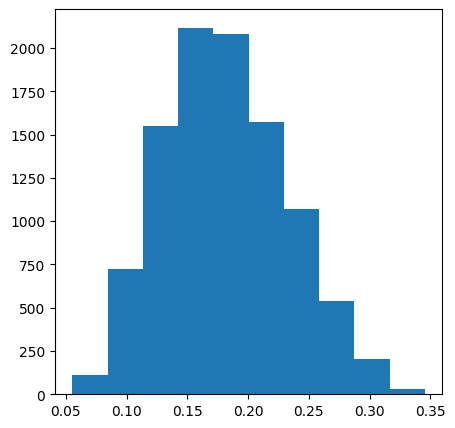

In [16]:
plt.hist(x_1)
plt.show()

In [17]:
normal_test(x_1)

Jarque-Bera test:
The test statistic 201.35401660534347
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 22.393005608175372
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are not normal  in significant leve 0.576
The Distribution are not normal  in significant leve 0.656
The Distribution are not normal  in significant leve 0.787
The Distribution are not normal  in significant leve 0.918
The Distribution are not normal  in significant leve 1.092
------------------------------------------------------------


In [18]:
pt2 = PowerTransformer(method='yeo-johnson')
x_1yeo_jons = pt2.fit_transform(df.iloc[:, 1].values.reshape(-1, 1))

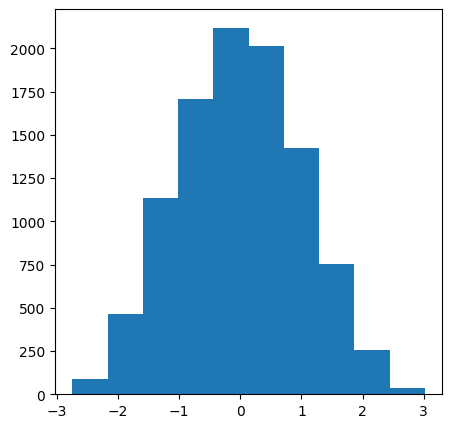

In [19]:
plt.hist(x_1yeo_jons)
plt.show()

In [20]:
normal_test(x_1yeo_jons.reshape(-1))

Jarque-Bera test:
The test statistic 99.28174683819843
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 6.824914751783581
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are not normal  in significant leve 0.576
The Distribution are not normal  in significant leve 0.656
The Distribution are not normal  in significant leve 0.787
The Distribution are not normal  in significant leve 0.918
The Distribution are not normal  in significant leve 1.092
------------------------------------------------------------


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1_scaled = scaler.fit_transform(df.iloc[:, 1].values.reshape(-1, 1))

In [22]:
normal_test(x1_scaled.reshape(-1))

Jarque-Bera test:
The test statistic 5101.050893622855
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 181.82159510606107
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are not normal  in significant leve 0.576
The Distribution are not normal  in significant leve 0.656
The Distribution are not normal  in significant leve 0.787
The Distribution are not normal  in significant leve 0.918
The Distribution are not normal  in significant leve 1.092
------------------------------------------------------------


In [23]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
x1_qt = qt.fit_transform(df.iloc[:, 1].values.reshape(-1, 1))

In [24]:
normal_test(x1_qt.reshape(-1))

Jarque-Bera test:
The test statistic 2.0585759826804457
------------------------------------------------------------
0.35726 | The Distribution are normal.
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 0.006972131259317393
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are normal in significant level 0.576
The Distribution are normal in significant level 0.656
The Distribution are normal in significant level 0.787
The Distribution are normal in significant level 0.918
The Distribution are normal in significant level 1.092
------------------------------------------------------------


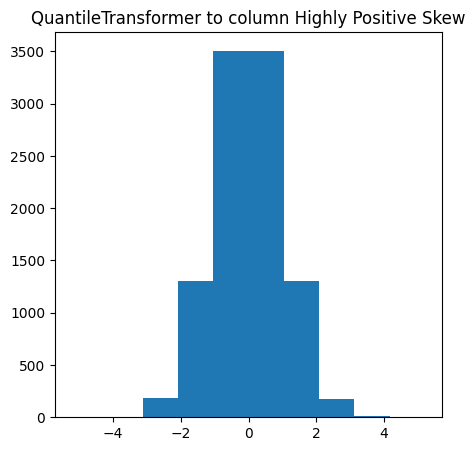

In [25]:
plt.hist(x1_qt)
plt.title('QuantileTransformer to column Highly Positive Skew' )
plt.show()

In [86]:
transform_df['HighlyPositiveSkew_Quantile'] = x1_qt

In [28]:
x2 = df.iloc[:, 2]

log_x2 = np.log(x2)
sqrt_x2 = np.sqrt(x2)
cbrt_x2 = np.cbrt(x2)
square_x2 = x2**2

sqrt_max = np.sqrt(x2) + x2
Reversed = 1 / x2
log_x2max = np.log(x2) - x2

In [31]:
train_df_x2 = pd.DataFrame({'log_x2': log_x2,
                         'sqrt_x2': sqrt_x2,
                         'cbrt': cbrt_x2,
                         'squre': square_x2,
                         'sqrt_plus': sqrt_max,
                         'reversed': Reversed,
                         'log_minus': log_x2max})

train_df_x2

,log_x2,sqrt_x2,cbrt,squre,sqrt_plus,reversed,log_minus
0,2.414193,3.343762,2.236095,125.009116,14.524510,0.089439,-8.766554
1,2.383514,3.292862,2.213344,117.569305,14.135800,0.092226,-8.459424
2,2.381205,3.289063,2.211642,117.027691,14.106997,0.092439,-8.436728
3,2.376260,3.280940,2.207999,115.875961,14.045510,0.092897,-8.388310
4,2.375196,3.279195,2.207216,115.629522,14.032311,0.092996,-8.377921
...,...,...,...,...,...,...,...
9995,NaN,NaN,-1.439170,8.885297,NaN,-0.335478,NaN
9996,NaN,NaN,-1.465513,9.906918,NaN,-0.317710,NaN
9997,NaN,NaN,-1.520786,12.371089,NaN,-0.284313,NaN
9998,NaN,NaN,-1.673860,21.994536,NaN,-0.213227,NaN


In [32]:
for i, v in enumerate(train_df_x2[['cbrt', 'squre', 'reversed']], 2):
    normal_test(train_df_x2[v])

Jarque-Bera test:
The test statistic 559279.8358995413
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 629.7223679070194
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are not normal  in significant leve 0.576
The Distribution are not normal  in significant leve 0.656
The Distribution are not normal  in significant leve 0.787
The Distribution are not normal  in significant leve 0.918
The Distribution are not normal  in significant leve 1.092
------------------------------------------------------------
Jarque-Bera test:
The test statistic 259.6860876008323
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_statis

------------------------

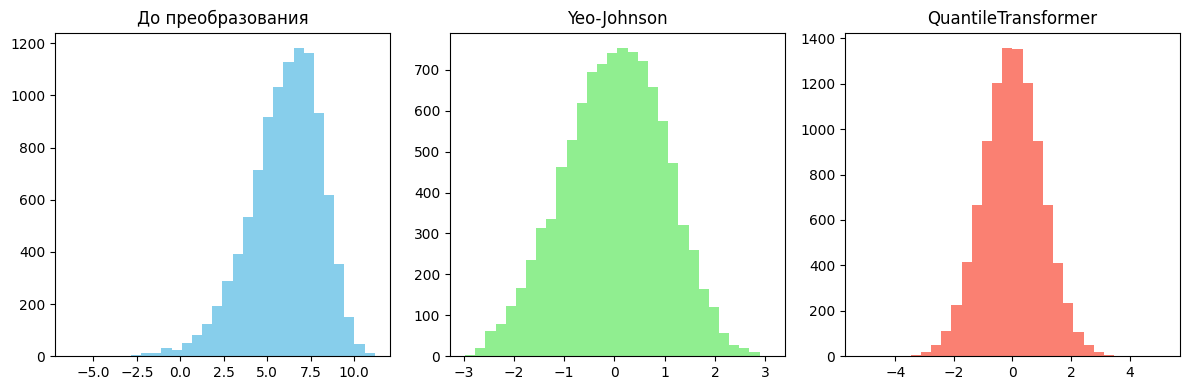

In [33]:
x = df['Moderate Negative Skew'].values.reshape(-1, 1)


pt = PowerTransformer(method='yeo-johnson')
x_yeojohnson = pt.fit_transform(x)


qt = QuantileTransformer(output_distribution='normal', random_state=0)
x_quantile = qt.fit_transform(x)


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(x, bins=30, color='skyblue')
plt.title("До преобразования")

plt.subplot(1, 3, 2)
plt.hist(x_yeojohnson, bins=30, color='lightgreen')
plt.title("Yeo-Johnson")

plt.subplot(1, 3, 3)
plt.hist(x_quantile, bins=30, color='salmon')
plt.title("QuantileTransformer")

plt.tight_layout()
plt.show()

In [34]:
normal_test(x_quantile.reshape(-1))

Jarque-Bera test:
The test statistic 1.1792316456918366
------------------------------------------------------------
0.55454 | The Distribution are normal.
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 0.006913132769113872
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are normal in significant level 0.576
The Distribution are normal in significant level 0.656
The Distribution are normal in significant level 0.787
The Distribution are normal in significant level 0.918
The Distribution are normal in significant level 1.092
------------------------------------------------------------


In [87]:
transform_df['x2_quantile'] = x_quantile

In [36]:
x3 = df.iloc[::, -1]

x3.agg(['skew', 'kurtosis']).T

skew       -1.201891
kurtosis    2.086863
Name: Highly Negative Skew, dtype: float64

In [37]:
x_reflected = max(x3) + 1 - x3
x3_trans = np.sqrt(x_reflected)

In [38]:
normal_test(x3_trans)

Jarque-Bera test:
The test statistic 540.4491097399209
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 40.760396752990346
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are not normal  in significant leve 0.576
The Distribution are not normal  in significant leve 0.656
The Distribution are not normal  in significant leve 0.787
The Distribution are not normal  in significant leve 0.918
The Distribution are not normal  in significant leve 1.092
------------------------------------------------------------


In [39]:
pt_yeo = PowerTransformer(method='yeo-johnson')
x3_yeo = pt_yeo.fit_transform(x3.values.reshape(-1, 1))

In [40]:
normal_test(x3_yeo.reshape(-1))

Jarque-Bera test:
The test statistic 300.5652937097261
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 37.778890921137645
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are not normal  in significant leve 0.576
The Distribution are not normal  in significant leve 0.656
The Distribution are not normal  in significant leve 0.787
The Distribution are not normal  in significant leve 0.918
The Distribution are not normal  in significant leve 1.092
------------------------------------------------------------


In [41]:
x3_qt = qt.fit_transform(x3.values.reshape(-1, 1))

In [42]:
normal_test(x3)

Jarque-Bera test:
The test statistic 4218.574113812125
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 168.7314161473223
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are not normal  in significant leve 0.576
The Distribution are not normal  in significant leve 0.656
The Distribution are not normal  in significant leve 0.787
The Distribution are not normal  in significant leve 0.918
The Distribution are not normal  in significant leve 1.092
------------------------------------------------------------


In [46]:
x3_yeo = pt_yeo.fit_transform(x3_t.values.reshape(-1, 1))

normal_test(x3_yeo.reshape(-1))

Jarque-Bera test:
The test statistic 39.09688619828659
------------------------------------------------------------
0.0 | The Distributed are not normaly
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 2.194153705921053
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are not normal  in significant leve 0.576
The Distribution are not normal  in significant leve 0.656
The Distribution are not normal  in significant leve 0.787
The Distribution are not normal  in significant leve 0.918
The Distribution are not normal  in significant leve 1.092
------------------------------------------------------------


(array([ 112.,  491., 1197., 1997., 2366., 2076., 1172.,  473.,  107.,
           9.]),
 array([-2.84437777, -2.21135309, -1.57832842, -0.94530375, -0.31227907,
         0.3207456 ,  0.95377027,  1.58679495,  2.21981962,  2.85284429,
         3.48586897]),
 <BarContainer object of 10 artists>)

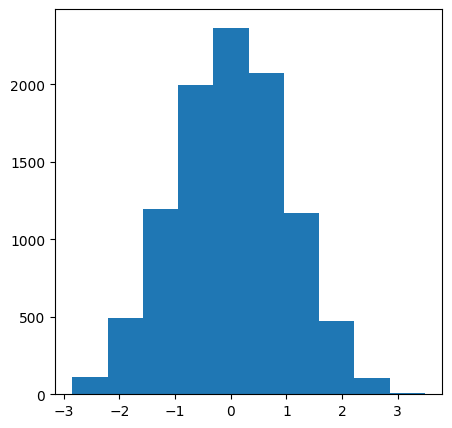

In [47]:
plt.hist(x3_yeo)

In [71]:
qq_x3 = QuantileTransformer(output_distribution='normal', random_state=42)
x_3_transform = qq_x3.fit_transform(x3.values.reshape(-1, 1))

In [88]:
transform_df['HighlyNegativeSkew_quantile'] = x_3_transform

In [73]:
normal_test(transform_df['HighlyNegativeSkew_quantile'])

Jarque-Bera test:
The test statistic 1.8458344849004555
------------------------------------------------------------
0.39736 | The Distribution are normal.
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 0.006164540787722217
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are normal in significant level 0.576
The Distribution are normal in significant level 0.656
The Distribution are normal in significant level 0.787
The Distribution are normal in significant level 0.918
The Distribution are normal in significant level 1.092
------------------------------------------------------------


In [74]:
import statsmodels.api as sm

In [89]:
df_normal = transform_df.copy()

In [94]:
transform_df.rename(columns={'x2_quantile': 'ModerateNegativeSkew_quantile'}, inplace=True)

In [95]:
transform_df

,ModeratePositiveSkew_cbrt,HighlyPositiveSkew_Quantile,ModerateNegativeSkew_quantile,HighlyNegativeSkew_quantile
0,0.965486,-5.199338,5.199338,5.199338
1,1.036503,-3.342974,3.227288,3.503580
2,1.049760,-3.326950,3.206801,3.453669
3,1.081261,-3.216858,3.167111,3.386210
4,1.098045,-3.186281,3.159208,3.239746
...,...,...,...,...
9995,2.452381,3.198360,-3.147619,-3.131880
9996,2.458211,3.216327,-3.162489,-3.174835
9997,2.480494,3.372712,-3.198205,-3.272809
9998,2.480921,3.588705,-3.350199,-3.419532


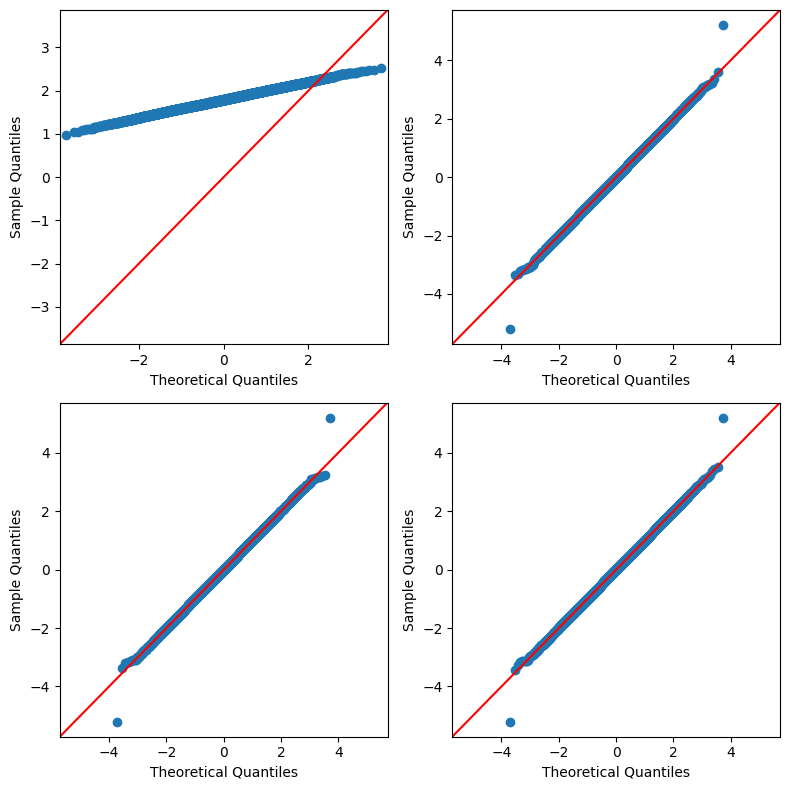

In [96]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for i, c in enumerate(transform_df):
    ind = i // 2
    col = i % 2
    sm.qqplot(transform_df[c], line='45', ax=ax[ind, col])

plt.tight_layout()
plt.show()

In [103]:
transform_df.agg(['skew', 'kurtosis']).T

,skew,kurtosis
ModeratePositiveSkew_cbrt,-0.021366,0.002805
HighlyPositiveSkew_Quantile,-0.000408,0.070920
ModerateNegativeSkew_quantile,-0.001436,0.053748
HighlyNegativeSkew_quantile,0.003126,0.066898


In [97]:
for i in transform_df:
    normal_test(transform_df[i])

Jarque-Bera test:
The test statistic 0.7626207834156722
------------------------------------------------------------
0.68297 | The Distribution are normal.
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 0.3896425834100228
critical = array([0.576, 0.656, 0.787, 0.918, 1.092])
------------------------------------------------------------
The Distribution are normal in significant level 0.576
The Distribution are normal in significant level 0.656
The Distribution are normal in significant level 0.787
The Distribution are normal in significant level 0.918
The Distribution are normal in significant level 1.092
------------------------------------------------------------
Jarque-Bera test:
The test statistic 2.0585759826804457
------------------------------------------------------------
0.35726 | The Distribution are normal.
------------------------------------------------------------
test Anderson Darling
test_statistic_Anderson = 

-------------------